In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
data=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Age: Represents the age of the patient. It provides information about the individual's chronological age, which can be a significant factor in assessing cardiovascular health.

#### Sex: Indicates the biological sex of the patient. It helps determine if there are any gender-related differences in the occurrence or manifestation of heart disease.

#### ChestPainType: Describes the type of chest pain experienced by the patient. Different types of chest pain can provide valuable insights into the nature and severity of cardiac conditions.

#### RestingBP: Refers to the resting blood pressure of the patient. It measures the force exerted by the blood against the walls of the arteries when the heart is at rest. Elevated resting blood pressure is associated with an increased risk of heart disease.

#### Cholesterol: Represents the serum cholesterol level of the patient. Cholesterol is a fatty substance found in the blood and high levels of cholesterol can contribute to the development of cardiovascular disease.

#### FastingBS: Indicates the fasting blood sugar level of the patient. Elevated fasting blood sugar levels may be indicative of diabetes or impaired glucose tolerance, both of which can increase the risk of heart disease.

#### RestingECG: Describes the resting electrocardiographic results of the patient. An electrocardiogram (ECG) measures the electrical activity of the heart and can provide insights into abnormal heart rhythms or structural abnormalities.

#### MaxHR: Represents the maximum heart rate achieved by the patient during exercise. Maximum heart rate is often used as an indicator of cardiovascular fitness and can be relevant in assessing heart disease risk.

#### ExerciseAngina: Indicates whether the patient experienced exercise-induced angina (chest pain) during physical exertion. Angina is a symptom of reduced blood flow to the heart muscle and can be a sign of underlying heart disease.

#### Oldpeak: Refers to the ST depression induced by exercise relative to rest. ST depression on an ECG can indicate insufficient blood supply to the heart and may suggest the presence of coronary artery disease.

#### ST_Slope: Describes the slope of the ST segment during peak exercise. Changes in the ST segment can provide information about the blood flow to the heart and can be indicative of underlying heart conditions.

#### HeartDisease: Indicates the presence or absence of heart disease in the patient. This is the target variable that you would aim to predict or analyze using the other features in the dataset.

In [5]:
print(data["RestingECG"].value_counts())
print(data["ChestPainType"].value_counts())
print(data["Sex"].value_counts())
print(data["ExerciseAngina"].value_counts())
print(data["ST_Slope"].value_counts())

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
M    725
F    193
Name: Sex, dtype: int64
N    547
Y    371
Name: ExerciseAngina, dtype: int64
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


In [6]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


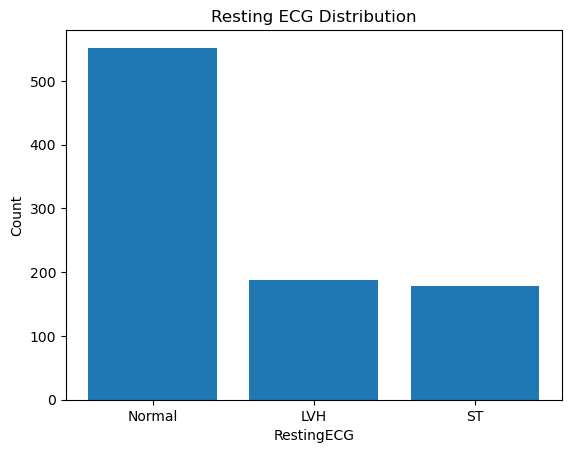

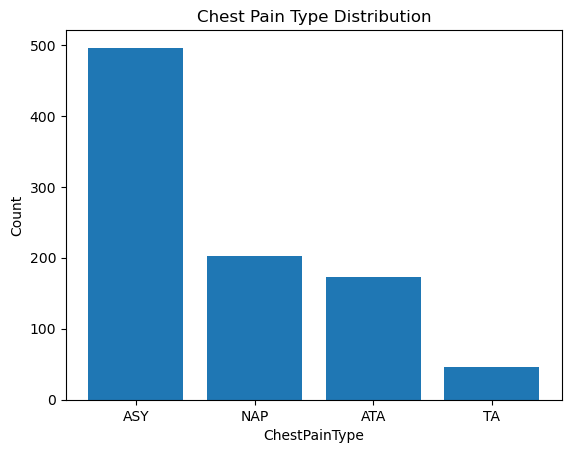

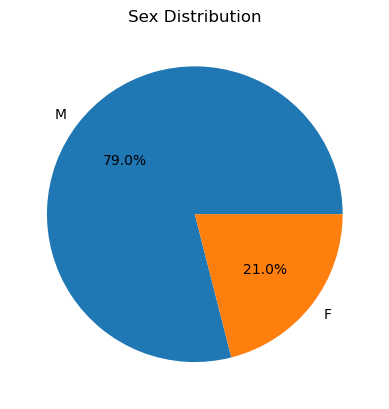

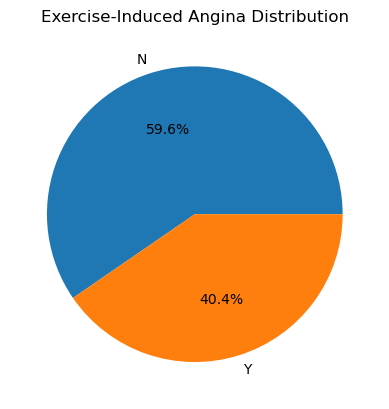

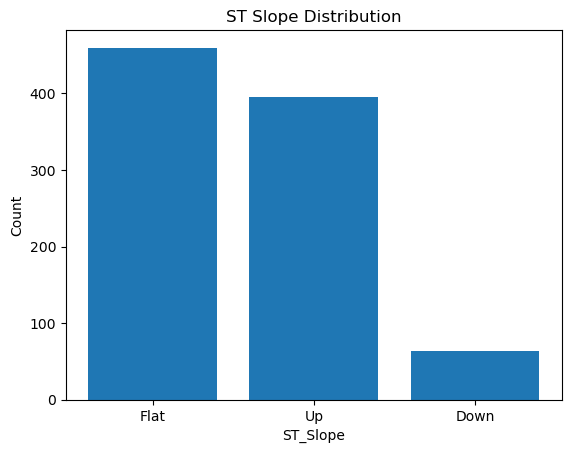

In [7]:
# RestingECG
resting_ecg_counts = [552, 188, 178]
resting_ecg_labels = ['Normal', 'LVH', 'ST']

plt.bar(resting_ecg_labels, resting_ecg_counts)
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.title('Resting ECG Distribution')
plt.show()

# ChestPainType
chest_pain_counts = [496, 203, 173, 46]
chest_pain_labels = ['ASY', 'NAP', 'ATA', 'TA']

plt.bar(chest_pain_labels, chest_pain_counts)
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.show()

# Sex
sex_counts = [725, 193]
sex_labels = ['M', 'F']

plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

# ExerciseAngina
exercise_angina_counts = [547, 371]
exercise_angina_labels = ['N', 'Y']

plt.pie(exercise_angina_counts, labels=exercise_angina_labels, autopct='%1.1f%%')
plt.title('Exercise-Induced Angina Distribution')
plt.show()

# ST_Slope
st_slope_counts = [460, 395, 63]
st_slope_labels = ['Flat', 'Up', 'Down']

plt.bar(st_slope_labels, st_slope_counts)
plt.xlabel('ST_Slope')
plt.ylabel('Count')
plt.title('ST Slope Distribution')
plt.show()


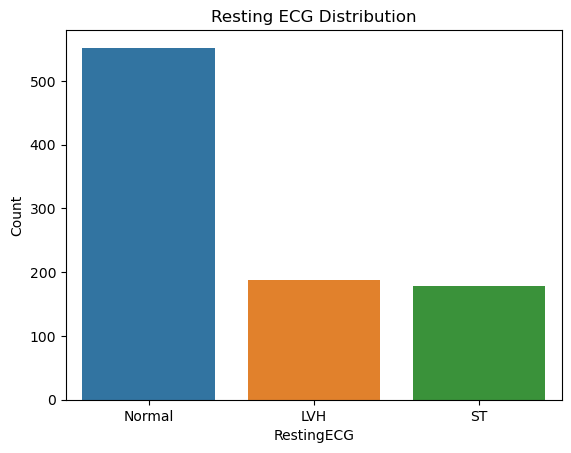

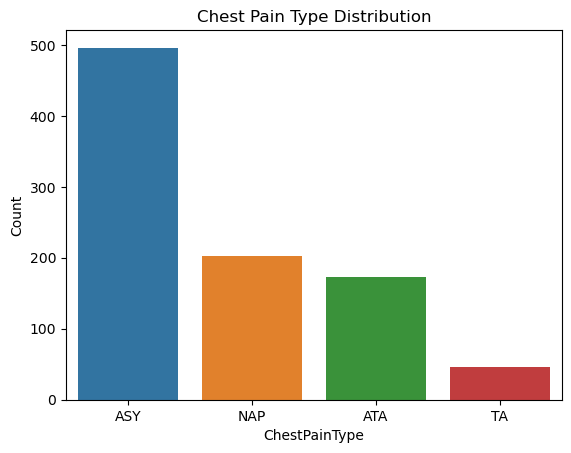

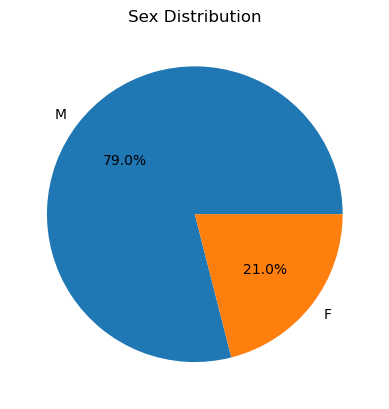

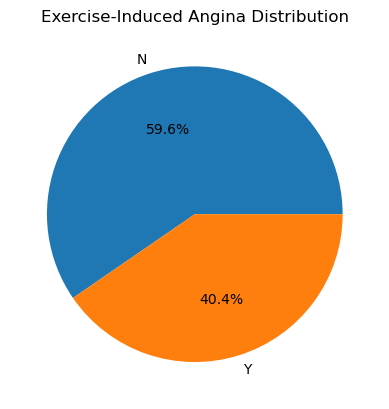

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [8]:
# RestingECG
resting_ecg_counts = [552, 188, 178]
resting_ecg_labels = ['Normal', 'LVH', 'ST']

sns.barplot(x=resting_ecg_labels, y=resting_ecg_counts)
plt.xlabel('RestingECG')
plt.ylabel('Count')
plt.title('Resting ECG Distribution')
plt.show()

# ChestPainType
chest_pain_counts = [496, 203, 173, 46]
chest_pain_labels = ['ASY', 'NAP', 'ATA', 'TA']

sns.barplot(x=chest_pain_labels, y=chest_pain_counts)
plt.xlabel('ChestPainType')
plt.ylabel('Count')
plt.title('Chest Pain Type Distribution')
plt.show()

# Sex
sex_counts = [725, 193]
sex_labels = ['M', 'F']

plt.pie(sex_counts, labels=sex_labels, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

# ExerciseAngina
exercise_angina_counts = [547, 371]
exercise_angina_labels = ['N', 'Y']

plt.pie(exercise_angina_counts, labels=exercise_angina_labels, autopct='%1.1f%%')
plt.title('Exercise-Induced Angina Distribution')
plt.show()

# ST_Slope
st_slope_counts = [460, 395, 63]
st_slope_labels = ['Flat', 'Up', 'Down']

sns.barplot


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Example data
resting_ecg = ['Normal', 'LVH', 'ST']
chest_pain_type = ['ASY', 'NAP', 'ATA', 'TA']
sex = ['M', 'F']
exercise_angina = ['N', 'Y']
st_slope = ['Flat', 'Up', 'Down']

# Fit and transform the categorical variables
resting_ecg_encoded = label_encoder.fit_transform(resting_ecg)
chest_pain_type_encoded = label_encoder.fit_transform(chest_pain_type)
sex_encoded = label_encoder.fit_transform(sex)
exercise_angina_encoded = label_encoder.fit_transform(exercise_angina)
st_slope_encoded = label_encoder.fit_transform(st_slope)

# Print the encoded values
print("RestingECG Encoded:", resting_ecg_encoded)
print("ChestPainType Encoded:", chest_pain_type_encoded)
print("Sex Encoded:", sex_encoded)
print("ExerciseAngina Encoded:", exercise_angina_encoded)
print("ST_Slope Encoded:", st_slope_encoded)


RestingECG Encoded: [1 0 2]
ChestPainType Encoded: [0 2 1 3]
Sex Encoded: [1 0]
ExerciseAngina Encoded: [0 1]
ST_Slope Encoded: [1 2 0]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["ChestPainType"] = label_encoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = label_encoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = label_encoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = label_encoder.fit_transform(data["ST_Slope"])

# Print the encoded DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [13]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [14]:
# Numerical features to be standardized
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [15]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114,0
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078,1
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114,0
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078,1
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114,0


In [16]:
# Split the data into training and testing sets
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of each classifier
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy}')


Logistic Regression: Accuracy = 0.8478260869565217
Decision Tree: Accuracy = 0.7989130434782609
K-Nearest Neighbors: Accuracy = 0.8478260869565217
Support Vector Machine: Accuracy = 0.8641304347826086
Random Forest: Accuracy = 0.8858695652173914


In [17]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8695652173913043
Precision: 0.9029126213592233
Recall: 0.8691588785046729
F1 Score: 0.8857142857142858


In [18]:
# Standardize the new input data using the same scaling factors as the training data
new_data = [[40, 1, 1, 140, 289, 0, 1, 172, 0, 0.0, 2]]
# Apply the same scaling factors as used for training data
new_data_scaled = scaler.transform(new_data)

# Make predictions on the standardized input data
predictions = rf_classifier.predict(new_data_scaled)
if(predictions==0):
    print("No disease Predicted")
else:
    print("Disease Predicted")

No disease Predicted


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
